## Coursera Capstone Project_Final (Week 4 and 5)

#### By Nattapol Patarapureeruk

## Introduction: Business Problem

Bangkok; the capital city of Thailand; is one of the world’s top destination for traveler for a decade. Over 45 million people fly to Thailand annually. There are a lot of perfect places in Bangkok for family, couple, and friends to spend time together. 

Unfortunately, as the Covid-19 situation is not getting better in a coming day, we do not have enough time to explore all fascinating places in Bangkok due to the social distance restriction. 
This project aims to create and analysis of similar places comparing between each area in Bangkok such as restaurants, groceries, street foods, and tourist attractions. It will help traveler to find all places that they should not miss when they are visiting Bangkok with limited time during the pandemic.


## Data Acquisition and Cleaning

#### Data Sources

Districts and coordinates of each venues in Bangkok
First, we need all information about district in Bangkok which includes district names, coordinate (longitude and latitude), and postal code which can be collected from Query Data World (https://query.data.world/s/o7qvkaesgxjg4hy4ilceeyubqch4fy)
Places, traffic, and venues’ coordinate in Bangkok

To explore all places in Bangkok, we need data about venues in each area around the city. All information such as names of the venue, location (coordinates), and venues’ category were retrieved from Foursquare API. 


#### Data Wrangling and Cleaning 

Let's start with importing the latitude and longitude of all districts covering all area of Bangkok. Then cleaning and formatting data a little bit, especially translating Thai words to English if it is available.

In [6]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/o7qvkaesgxjg4hy4ilceeyubqch4fy')

In [7]:
df = df.drop(columns = ['amphurTH','pop','area'])
df = df.rename(columns={'amphurEN':'district', 'changwat':'province', 'zip':'postal code'})
df = df[df['province'] =='Krung Thep Maha Nakhon'].reset_index(drop=True)
df['postal code'] = df['postal code'].apply(lambda val:int(val))

In [8]:
df['province'] = 'Bangkok'

df_bkk = df
df_bkk

,district,province,lat,long,postal code
0,Bang Kapi,Bangkok,13.765830,100.647780,10240
1,Bang Khae,Bangkok,13.696110,100.409440,10160
2,Bang Khen,Bangkok,13.873890,100.596390,10220
3,Bang Kho Laem,Bangkok,13.693330,100.502500,10120
4,Bang Khun Thian,Bangkok,13.660830,100.435830,10150
5,Bangkok Noi,Bangkok,13.762780,100.478060,10700
6,Bangkok Yai,Bangkok,13.722780,100.476390,10600
7,Bang Na,Bangkok,13.667220,100.641940,10260
8,Bang Phlat,Bangkok,13.793890,100.505000,10700
9,Bang Rak,Bangkok,13.730830,100.524170,10500


To find out what Bangkok looks like, Geopy, matplotlib, and folium have been used together to create and display all area of Bangkok

In [9]:
from geopy.geocoders import Nominatim

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

# Import map rendering library
!pip install folium
import folium 


print('Libraries imported.')

     |████████████████████████████████| 94 kB 6.6 MB/s  eta 0:00:01
Libraries imported.


In [10]:
address = 'Bangkok, TH'

geolocator = Nominatim(user_agent='Bangkokien')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangkok are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangkok are 13.7544238, 100.4930399.


In [11]:
# create map of Bangkok using latitude and longitude values
map_bkk = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_bkk['lat'], df_bkk['long'], df_bkk['district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bkk) 


In [12]:
map_bkk

Next step, data from Foursquare is needed. Names of venue, coordinate, and type of venue were collected through Foursquare API.

In [13]:
CLIENT_ID = 'DXSHKNVNMEML1QHCOJTSOJY1BYRCHYLLUS1GJIBHHUHFEUD1' # your Foursquare ID
CLIENT_SECRET = '34YKWOCHXYTWJEIOMDXMNMZAAN5RDP30E0BB2SV3YFWRRSCJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails: np')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails: np


In [14]:
import requests #Get URL

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['district', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:

radius = 500
LIMIT = 100
bkk_venues = getNearbyVenues(names=df_bkk['district'],
                                   latitudes=df_bkk['lat'],
                                   longitudes=df_bkk['long']
                                  )

Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bangkok Noi
Bangkok Yai
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Khong
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


These are the summary lists of all venue located inside Bangkok area.

In [16]:
bkk_venues

,district,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Kapi,13.76583,100.64778,ตลาดนัดแฟลตคลองจั่น,13.770105,100.649124,Flea Market
1,Bang Kapi,13.76583,100.64778,ซ้งโภชนา ลูกชิ้นปลาทำเอง,13.761873,100.648290,Noodle House
2,Bang Kapi,13.76583,100.64778,Suan Son (สวนสน),13.762940,100.648895,Neighborhood
3,Bang Kapi,13.76583,100.64778,Bang Kapi Market (ตลาดบางกะปิ),13.766543,100.646203,Market
4,Bang Kapi,13.76583,100.64778,ทรงกิจลูกชิ้นเนื้อวัว,13.763036,100.648485,Noodle House
...,...,...,...,...,...,...,...
1063,Yan Nawa,13.69694,100.54306,Hermes Spa,13.698675,100.543722,Spa
1064,Yan Nawa,13.69694,100.54306,Lavita Coffee,13.698132,100.540867,Coffee Shop
1065,Yan Nawa,13.69694,100.54306,Acer Service Center,13.700052,100.545886,Electronics Store
1066,Yan Nawa,13.69694,100.54306,The Deck,13.700613,100.542068,Breakfast Spot


In [17]:
bkk_venues.groupby('district').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
district,,,,,,
Bang Kapi,19,19,19,19,19,19
Bang Khae,12,12,12,12,12,12
Bang Khen,11,11,11,11,11,11
Bang Kho Laem,15,15,15,15,15,15
Bang Khun Thian,40,40,40,40,40,40
Bang Na,25,25,25,25,25,25
Bang Phlat,13,13,13,13,13,13
Bang Rak,31,31,31,31,31,31
Bang Sue,14,14,14,14,14,14


In [18]:
print('There are {} uniques categories.'.format(len(bkk_venues['Venue Category'].unique())))

There are 153 uniques categories.


Next, we tried to find the most common place in terms of venue type for each area.

In [19]:
# one hot encoding
bkk_onehot = pd.get_dummies(bkk_venues[['Venue Category']], prefix="", prefix_sep="")
bkk_onehot

# add neighborhood column back to dataframe
bkk_onehot['district'] = bkk_venues['district'] 

# I think this part is unnecessary
# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#fixed_columns

#toronto_onehot = toronto_onehot[fixed_columns]
#toronto_onehot = toronto_onehot.rename(columns={'_Neighborhood':'Neighborhood'})

bkk_onehot

,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,...,Thai Restaurant,Theater,Toll Plaza,Tour Provider,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wings Joint,district
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bang Kapi
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bang Kapi
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bang Kapi
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bang Kapi
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bang Kapi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yan Nawa
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yan Nawa
1065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yan Nawa
1066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yan Nawa


In [20]:
bkk_grouped = bkk_onehot.groupby(['district']).mean().reset_index()
bkk_grouped.head()

,district,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,...,Tea Room,Thai Restaurant,Theater,Toll Plaza,Tour Provider,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wings Joint
0,Bang Kapi,0.0,0.0,0.0,0.000000,0.0,0.0,0.052632,0.000,0.00,...,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Bang Khae,0.0,0.0,0.0,0.083333,0.0,0.0,0.083333,0.000,0.00,...,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Bang Khen,0.0,0.0,0.0,0.181818,0.0,0.0,0.000000,0.000,0.00,...,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0
3,Bang Kho Laem,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000,0.00,...,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0
4,Bang Khun Thian,0.0,0.0,0.0,0.000000,0.0,0.0,0.025000,0.025,0.05,...,0.0,0.075000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['district']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['district'] = bkk_grouped['district']

for ind in np.arange(bkk_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bkk_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Kapi,Noodle House,Convenience Store,Flea Market,Neighborhood,Multiplex
1,Bang Khae,Convenience Store,Noodle House,Supermarket,Asian Restaurant,Shopping Mall
2,Bang Khen,Asian Restaurant,Convenience Store,Som Tum Restaurant,Thai Restaurant,Garden
3,Bang Kho Laem,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee Shop,Supermarket
4,Bang Khun Thian,Japanese Restaurant,Thai Restaurant,Bakery,Restaurant,Gym / Fitness Center


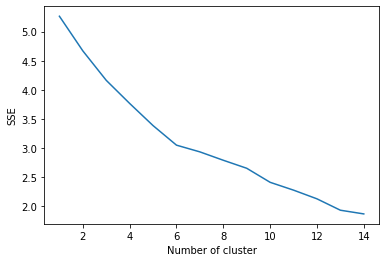

In [34]:
#import matplotlib.pyplot as plt

#sse = {}
#for k in range(1,15):
#    kmeans = KMeans(n_clusters=k,random_state=0)
#    kmeans.fit(bkk_grouped.drop('district',axis=1))
#    district_venues_sorted['Cluster Labels'] = kmeans.labels_
#    sse[k] = kmeans.inertia_

#plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")
#plt.show()

#### Methodology (K-mean Clustering)

After we got the most common venue for each district, we tried to group some district together based on available information by using k-mean clustering as a main tool.

In [36]:
# set number of clusters
kclusters = 5

bkk_grouped_clustering = bkk_grouped.drop('district', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bkk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 4, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [37]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
district_venues_sorted.head()

,Cluster Labels,district,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Bang Kapi,Noodle House,Convenience Store,Flea Market,Neighborhood,Multiplex
1,4,Bang Khae,Convenience Store,Noodle House,Supermarket,Asian Restaurant,Shopping Mall
2,4,Bang Khen,Asian Restaurant,Convenience Store,Som Tum Restaurant,Thai Restaurant,Garden
3,0,Bang Kho Laem,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee Shop,Supermarket
4,1,Bang Khun Thian,Japanese Restaurant,Thai Restaurant,Bakery,Restaurant,Gym / Fitness Center


In [38]:
bkk_merged = df_bkk

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighbourhood
bkk_merged = bkk_merged.join(district_venues_sorted.set_index('district'), on='district')

bkk_merged = bkk_merged.dropna(axis=0)

In [39]:
bkk_merged['Cluster Labels'] = bkk_merged['Cluster Labels'].apply(lambda val:int(val))
bkk_merged.head()

,district,province,lat,long,postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Kapi,Bangkok,13.76583,100.64778,10240,0,Noodle House,Convenience Store,Flea Market,Neighborhood,Multiplex
1,Bang Khae,Bangkok,13.69611,100.40944,10160,4,Convenience Store,Noodle House,Supermarket,Asian Restaurant,Shopping Mall
2,Bang Khen,Bangkok,13.87389,100.59639,10220,4,Asian Restaurant,Convenience Store,Som Tum Restaurant,Thai Restaurant,Garden
3,Bang Kho Laem,Bangkok,13.69333,100.50250,10120,0,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee Shop,Supermarket
4,Bang Khun Thian,Bangkok,13.66083,100.43583,10150,1,Japanese Restaurant,Thai Restaurant,Bakery,Restaurant,Gym / Fitness Center


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bkk_merged['lat'], bkk_merged['long'], bkk_merged['district'], bkk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally, we got 4 clusters as shown below

Cluster 1

In [29]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 0, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Kapi,0,Noodle House,Convenience Store,Flea Market,Neighborhood,Multiplex
3,Bang Kho Laem,0,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee Shop,Supermarket
6,Bangkok Yai,0,Noodle House,Farmers Market,Dessert Shop,Asian Restaurant,Coffee Shop
9,Bang Rak,0,Noodle House,Hotel,Chinese Restaurant,Thai Restaurant,Massage Studio
10,Bang Sue,0,Thai Restaurant,Noodle House,Coffee Shop,Bar,Seafood Restaurant
16,Dusit,0,Noodle House,Convenience Store,Coffee Shop,Asian Restaurant,Dessert Shop
17,Huai Khwang,0,Noodle House,Hotel,Som Tum Restaurant,Convenience Store,Hotpot Restaurant
25,Lat Phrao,0,Noodle House,Café,Som Tum Restaurant,Asian Restaurant,Coffee Shop
29,Pathum Wan,0,Noodle House,Thai Restaurant,Chinese Restaurant,Som Tum Restaurant,Steakhouse
41,Sathon,0,Noodle House,Asian Restaurant,Dessert Shop,Convenience Store,Chinese Restaurant


Cluster 2

In [30]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 1, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Bang Khun Thian,1,Japanese Restaurant,Thai Restaurant,Bakery,Restaurant,Gym / Fitness Center
5,Bangkok Noi,1,Market,Dessert Shop,Convenience Store,Canal,Farmers Market
7,Bang Na,1,Convenience Store,Japanese Restaurant,Coffee Shop,Fast Food Restaurant,Noodle House
8,Bang Phlat,1,Som Tum Restaurant,Convenience Store,Bus Stop,Bed & Breakfast,Massage Studio
12,Chatuchak,1,Coffee Shop,Thai Restaurant,Flea Market,Beer Bar,Bed & Breakfast
13,Chom Thong,1,American Restaurant,Convenience Store,Fast Food Restaurant,Thai Restaurant,Toll Plaza
14,Din Daeng,1,Toll Plaza,Convenience Store,Soccer Field,Recreation Center,Sports Club
15,Don Mueang,1,Restaurant,Convenience Store,Thai Restaurant,RV Park,Café
19,Khlong Sam Wa,1,Pub,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Convenience Store
20,Khlong San,1,Coffee Shop,Café,Dessert Shop,Noodle House,Hotel Bar


Cluster 3

In [31]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 2, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,Thung Khru,2,Cupcake Shop,Lounge,Wings Joint,Flea Market,Fried Chicken Joint


Cluster 4

In [32]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 3, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
28,Nong Khaem,3,Dessert Shop,Noodle House,Thai Restaurant,Market,Floating Market
36,Rat Burana,3,Thai Restaurant,Asian Restaurant,Som Tum Restaurant,Vietnamese Restaurant,Hotpot Restaurant
38,Sai Mai,3,Thai Restaurant,Bar,Asian Restaurant,Noodle House,Grocery Store
40,Saphan Sung,3,Thai Restaurant,Japanese Restaurant,Convenience Store,Stadium,Wings Joint


Cluster 5

In [33]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 4, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,district,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Bang Khae,4,Convenience Store,Noodle House,Supermarket,Asian Restaurant,Shopping Mall
2,Bang Khen,4,Asian Restaurant,Convenience Store,Som Tum Restaurant,Thai Restaurant,Garden
11,Bueng Kum,4,Park,Market,Miscellaneous Shop,Convenience Store,Shop & Service
18,Khan Na Yao,4,Asian Restaurant,Convenience Store,Som Tum Restaurant,Thai Restaurant,Garden
22,Khong,4,Convenience Store,Food Court,Noodle House,Shopping Mall,Coffee Shop
27,Nong Chok,4,Park,Other Repair Shop,Asian Restaurant,Convenience Store,Shopping Mall
35,Prawet,4,Convenience Store,Halal Restaurant,Noodle House,Comfort Food Restaurant,Flea Market
43,Taling Chan,4,Seafood Restaurant,Convenience Store,Noodle House,Floating Market,Satay Restaurant


### Result and Discussion Section

Based on the result of the model, all districts in Bangkok can be classified to 5 groups which are

1. Eat all day: especially for one who loves noodles, asian food, and dessert
2. Cafe hopping and night life: fun forever
3. Outliers: I was surprised how was this result came from, so I have considered this cluster as an outlier
4. Traditional Thai things
5. Outskirt: nothing special there unless you want to go shopping at seven-eleven (convenience store)

So if you are travelers, I will suggest you; based on the result of the model; that you should visit only 3 cluster which are cluster 1, 2, and 4. There are a lot of fascinating places in those areas especially foods, drinks, and traditional Thai venues.

However, in fact, the minority of the result contradicts what actually in Bangkok it is. After an investigation, I found that it must be because of Foursquare data. The majority of foursquare users in Thailand are foreigner so all information are highly reflected from foreigner's perspective not Thai people as it should be. This might be one of the weaknesses relying solely on Foursquare API.

### Conclusion

In this project, K-means clustring has been used to classify similar districts in Bangkok in terms of venues and interesting places. All information were supported by data world and Foursquare API. At the end, the model suggested to classify all districts into 5 groups as discussed in result section. Even though it is not perfect as it should be due to some limitation of input data, it can help traveler to explore Bangkok more effectively and fulfil their needs and expectations.